Image  1
1/1 [==============================] - 1s 586ms/step
Predicted by Resnet: [[('n04326547', 'stone_wall', 0.6257557)]]
1/1 [==============================] - 0s 198ms/step
Predicted by VGG: lakeside (41.84%)



Image  2
1/1 [==============================] - 0s 67ms/step
Predicted by Resnet: [[('n04417672', 'thatch', 0.3242905)]]
1/1 [==============================] - 0s 108ms/step
Predicted by VGG: worm_fence (12.98%)



Image  3
1/1 [==============================] - 0s 62ms/step
Predicted by Resnet: [[('n04326547', 'stone_wall', 0.48797294)]]
1/1 [==============================] - 0s 95ms/step
Predicted by VGG: lakeside (14.97%)



Image  4
1/1 [==============================] - 0s 73ms/step
Predicted by Resnet: [[('n04326547', 'stone_wall', 0.66671306)]]
1/1 [==============================] - 0s 111ms/step
Predicted by VGG: castle (9.13%)



Image  5
1/1 [==============================] - 0s 61ms/step
Predicted by Resnet: [[('n09332890', 'lakeside', 0.14654422)]]
1/1 [======

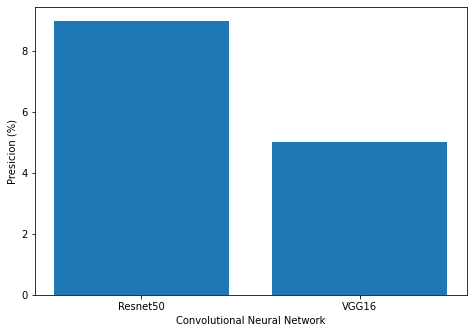

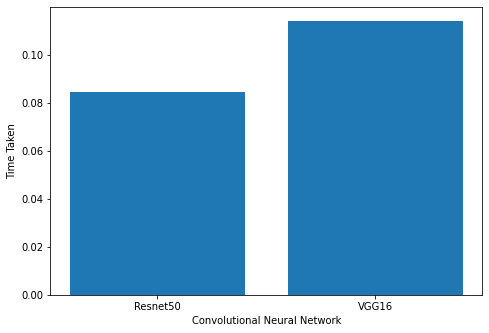

In [7]:
import tensorflow as tf
import os

from tensorflow.keras.applications.resnet50 import ResNet50
from tensorflow.keras.preprocessing import image
from tensorflow.keras.applications.resnet50 import preprocess_input, decode_predictions
from keras.applications.vgg16 import preprocess_input
from keras.applications.vgg16 import decode_predictions
from keras.applications.vgg16 import VGG16
import numpy as np
from tensorflow.keras.utils import load_img
from tensorflow.keras.utils import img_to_array

# For Evaluation

import matplotlib.pyplot as plt
import time
resnet_model = ResNet50(weights='imagenet')
vgg_model = VGG16()
resnet_score = 0
vgg_score = 0
# cwd = os.getcwd()
# data_dir = os.path.join(cwd, 'dataset')
# images = []
# print(data_dir)

directory = 'dataset'
imgNum = 1

resnet_time = 0
vgg_time = 0

for filename in os.listdir(directory):

    print ("Image ", imgNum)
    imgNum+=1
    f = os.path.join(directory, filename)

    if os.path.isfile(f):

        img = image.load_img(f, target_size=(224, 224))
        x = image.img_to_array(img)
        x = np.expand_dims(x, axis=0)
        x = preprocess_input(x)

        #resnet
        start_time = time.time()
        resnet_pred = resnet_model.predict(x)
        resnet_time = time.time() - start_time
        resnet_dec = decode_predictions(resnet_pred, top=1)[0][0][1]
        print('Predicted by Resnet:', decode_predictions(resnet_pred, top=1))
        if(resnet_dec == "crane"):
            resnet_score += 1

        # vgg
        start_time = time.time()
        vgg_pred = vgg_model.predict(x)
        vgg_time = time.time() - start_time

        vgg_dec = decode_predictions(vgg_pred)
        vgg_dec = vgg_dec[0][0]
        print('Predicted by VGG: %s (%.2f%%)' % (vgg_dec[1], vgg_dec[2]*100))
        if(vgg_dec[1] == "crane"):
            vgg_score += 1

        print ("\n\n")



print ("Resnet Score: ",resnet_score)
print ("VGG Score: ", vgg_score)


# Precisicion  (MAP)
resnet_map = resnet_score/imgNum
vgg_map = vgg_score/imgNum

resnet_prec = round(resnet_map*100)
vgg_prec = round(vgg_map*100)
print ("Resnet Precision: ",resnet_map, "(", resnet_prec, "%)")
print ("VGG Precision: ", vgg_map, "(", round(vgg_map*100), "%)")

fig = plt.figure()
ax = fig.add_axes([0,0,1,1])
ax.set_ylabel('Presicion (%)')
ax.set_xlabel('Convolutional Neural Network')
cnn = ['Resnet50', 'VGG16']
scores = [resnet_prec, vgg_prec]
ax.bar(cnn, scores)
plt.show()

fig = plt.figure()
ax = fig.add_axes([0,0,1,1])
ax.set_ylabel('Time Taken')
ax.set_xlabel('Convolutional Neural Network')
cnn = ['Resnet50', 'VGG16']
times = [resnet_time, vgg_time]
ax.bar(cnn, times)
plt.show()